# Trabalho Final

## Informações do Dataset

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde acontecem algumas festas com turmas de alunos de 18 a 28 anos (média). O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo uma Meta, com período de um ano.

Dataset: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

1.   Data
2.   Temperatura média (C)
3.   Temperatura mínima (C)
4.   Temperatura máxima (C)
5.   Precipitação (mm)
6.   Final de semana
7.   Consumo de cerveja (litros)



In [4]:
# Importando bibliotecas
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
%matplotlib inline 

sns.set_style("darkgrid")

In [5]:
# Carregando repositório com dataset
!wget https://github.com/Andrewsas/trabalho-fundamentos-cid/blob/master/data/Consumo_cerveja.csv?raw=true

# Renomeando dataset
!mv './Consumo_cerveja.csv?raw=true' 'dataset_consumo_cerveja.csv'

# Criando dataframe
df_consumo_cerveja = pd.read_csv('dataset_consumo_cerveja.csv')

--2021-06-25 19:42:25--  https://github.com/Andrewsas/trabalho-fundamentos-cid/blob/master/data/Consumo_cerveja.csv?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Andrewsas/trabalho-fundamentos-cid/raw/master/data/Consumo_cerveja.csv [following]
--2021-06-25 19:42:25--  https://github.com/Andrewsas/trabalho-fundamentos-cid/raw/master/data/Consumo_cerveja.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Andrewsas/trabalho-fundamentos-cid/master/data/Consumo_cerveja.csv [following]
--2021-06-25 19:42:25--  https://raw.githubusercontent.com/Andrewsas/trabalho-fundamentos-cid/master/data/Consumo_cerveja.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting

# Normalização de Dados

In [6]:
# Dados iniciais
df_consumo_cerveja

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Identificando se existe valores nulos no dataframe
df_consumo_cerveja.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [8]:
# Removendo valores nulos
df_consumo_cerveja.dropna(inplace=True)

#Treat numeric values from dataframe
def str_to_num(df_aux, index):
  for i in index:
    col_name = df_aux.columns[i]
    df_aux[col_name] = df_aux[col_name].str.replace('.', '')
    df_aux[col_name] = df_aux[col_name].str.replace(',', '.')
    df_aux[col_name] = pd.to_numeric(df_aux[col_name])
  return df_aux

#transform field types
df_consumo_cerveja = str_to_num(df_consumo_cerveja, [1, 2, 3, 4])

#rename column
df_consumo_cerveja = df_consumo_cerveja.rename(columns={"Consumo de cerveja (litros)": "Consumo de cerveja (Kl)"})

# Apresentando dataframe normalizado
df_consumo_cerveja = df_consumo_cerveja.round(2)
df_consumo_cerveja

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (Kl)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.46
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.97
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.81
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.80
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.90
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.31
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.10
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.31
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.47


Convertendo Valores para Numéricos

In [9]:
columns_aux = ["Temperatura Media (C)", "Temperatura Minima (C)", "Temperatura Maxima (C)", "Precipitacao (mm)", "Final de Semana"]
df_consumo_cerveja[columns_aux] = \
    df_consumo_cerveja[columns_aux].apply(pd.to_numeric)

In [10]:
# Informações do dataframe
df_consumo_cerveja.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     365 non-null    object 
 1   Temperatura Media (C)    365 non-null    float64
 2   Temperatura Minima (C)   365 non-null    float64
 3   Temperatura Maxima (C)   365 non-null    float64
 4   Precipitacao (mm)        365 non-null    float64
 5   Final de Semana          365 non-null    float64
 6   Consumo de cerveja (Kl)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [11]:
df_consumo_cerveja.describe().round(2)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (Kl)
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


# Análise exploratória

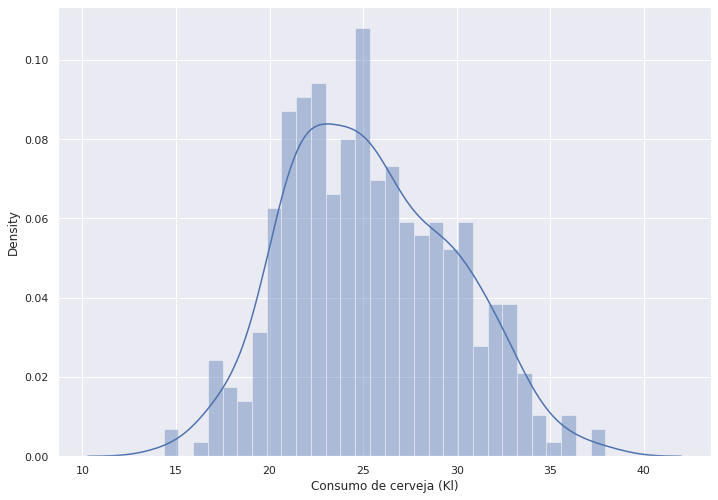

In [12]:
# Analisar distribuição e identificar outliers
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_consumo_cerveja['Consumo de cerveja (Kl)'], bins=30)
plt.show()

                         Temperatura Media (C)  ...  Consumo de cerveja (Kl)
Temperatura Media (C)                     1.00  ...                     0.57
Temperatura Minima (C)                    0.86  ...                     0.39
Temperatura Maxima (C)                    0.92  ...                     0.64
Precipitacao (mm)                         0.02  ...                    -0.19
Final de Semana                          -0.05  ...                     0.51
Consumo de cerveja (Kl)                   0.57  ...                     1.00

[6 rows x 6 columns]


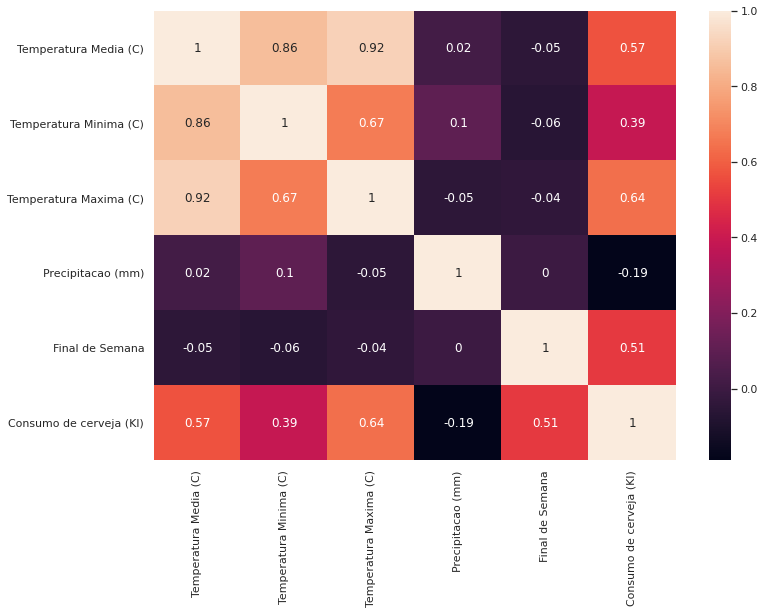

In [13]:
#Correlação de variáveis
correlation_matrix = df_consumo_cerveja.corr().round(2)
print(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True)

## Gráficos de dispersão entre as variáveis do dataset

Plota o relacionamento entre pares de variáveis em um dataset em formato de grafico de dispersão

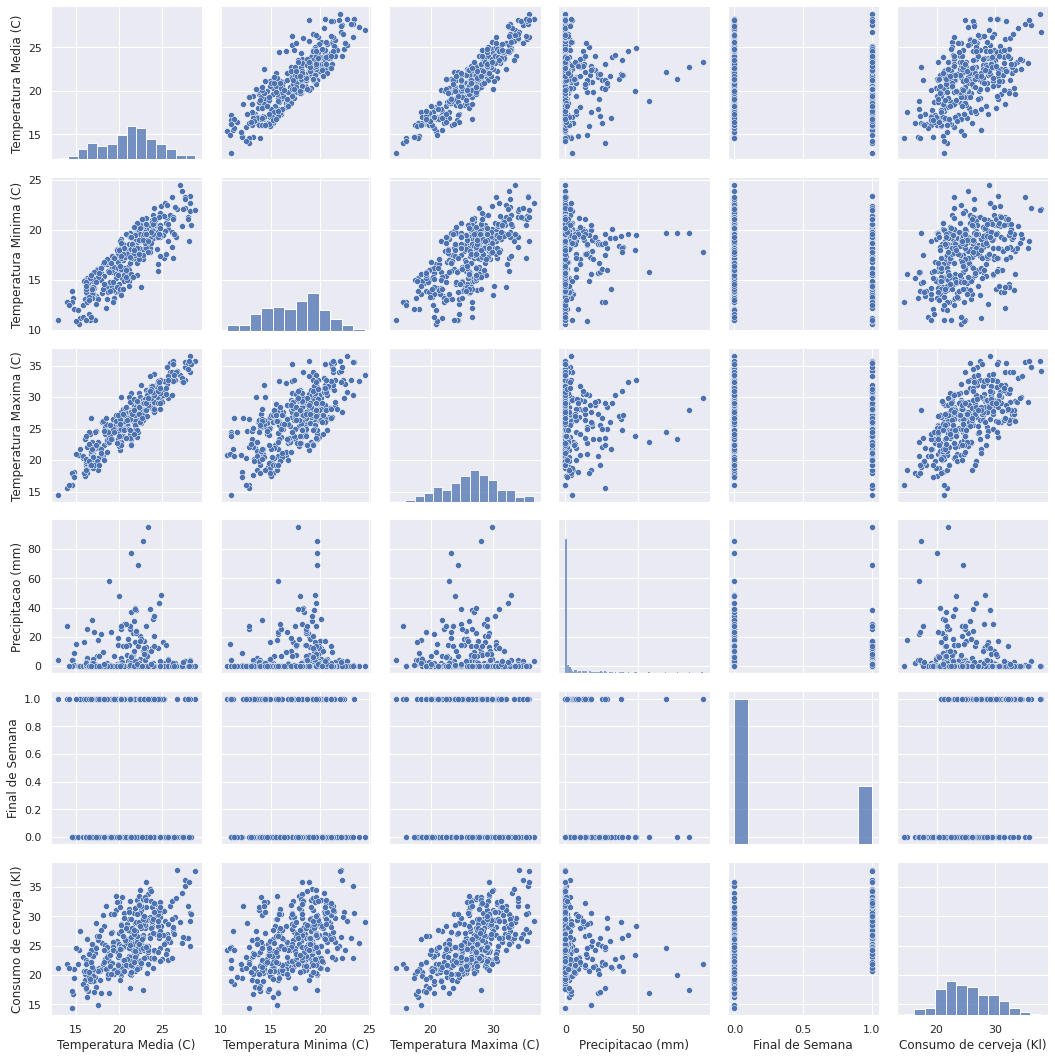

In [14]:
ax = sns.pairplot(df_consumo_cerveja)

# Seleção da Variaveis para compor o Modelo de Regressão

Foram escolhidos 3 atributos para compor o modelo de Regressão multiplo: Temperatura Maxima (C),Precipitacao (mm), Final de Semana.

As Teperatura tinha uma boa correlação com a variavel alvo porem não poderiam se colocadas juntas devido existe um correlação de causa forte com outros atributos de temperatua, então optou-se pela Temperatura Maxima.

O Final de Semana foi escolhido por ter uma boa correlaão com a variavel alvo (Consumo), apontando que fim de semanas costumam ter indices mais altos de consumo.

A Preciptação em milimetros, ou seja, a chuva do dia tem uma correlação fraca com o consumo, logo independete da chuva o fluxo do consumo se mantem, mas quando o nivel de preciptação é elevado podemos há uma tendencia de queda no consumo do dia.

In [15]:
variavel_alvo = 'Consumo de cerveja (Kl)' 
variaveis_modelo = ['Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana']

# Regressão Linear

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

## scikit-learn (https://scikit-learn.org/stable/)

O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.

In [16]:
from sklearn import linear_model
# Criando modelo
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

# Define os valores de x e y
num_observ = len(df_consumo_cerveja)
X = df_consumo_cerveja['Temperatura Maxima (C)'].values.reshape((num_observ, 1)) 
y = df_consumo_cerveja['Consumo de cerveja (Kl)'].values 

# Treinamento do modelo - fit()
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Imprime as previsões
print (modelo.predict(X))

[29.25733594 29.91214803 27.55482452 26.7035688  26.50712518 27.94771177
 30.04311045 29.45377957 30.23955407 30.37051649 30.76340374 31.15629099
 30.76340374 30.23955407 29.45377957 29.38829836 31.41821583 31.28725341
 31.87658429 31.28725341 28.2096366  25.06653858 25.06653858 27.22741847
 27.62030572 26.76905001 26.76905001 27.55482452 27.09645605 25.59038825
 23.88787683 26.31068155 25.32846342 28.34059902 23.49498958 22.97113991
 24.60817012 26.76905001 27.29289968 28.07867418 26.96549364 27.88223056
 29.38829836 28.99541111 28.66800506 26.04875671 25.85231309 26.31068155
 25.26298221 26.63808759 26.44164397 28.34059902 28.14415539 28.53704265
 28.86444869 27.16193726 27.81674935 28.53704265 26.11423792 25.197501
 27.09645605 27.29289968 27.94771177 28.66800506 26.63808759 25.39394463
 23.95335804 23.23306474 25.59038825 26.37616276 25.59038825 25.39394463
 26.24520034 25.52490705 27.22741847 24.73913254 23.75691441 25.72135067
 26.44164397 24.54268891 22.9056587  23.23306474 25.1

In [18]:
# Fazendo previsões com o modelo treinado
TM = 33
Xp = np.array(TM).reshape(-1, 1)
print ("Se Temperatura Máxima = %01.f nosso modelo prevê que o consumo de bebida é %0.1f" % (TM, modelo.predict(Xp)))

Se Temperatura Máxima = 33 nosso modelo prevê que o consumo de bebida é 29.6


# StatsModels (https://www.statsmodels.org/stable/index.html)

In [19]:
variavel_dependente = df_consumo_cerveja[variavel_alvo]
variavel_independente = df_consumo_cerveja[variaveis_modelo]

In [20]:
variavel_independente_ajustada = sm.add_constant(variavel_independente) 

# criando modelos 
modelo_OLS = sm.OLS(variavel_dependente,variavel_independente_ajustada).fit()
modelo_WLS = sm.WLS(variavel_dependente,variavel_independente_ajustada).fit()
modelo_GLS = sm.GLS(variavel_dependente,variavel_independente_ajustada).fit()
modelo_GLM = sm.GLM(variavel_dependente,variavel_independente_ajustada, family=sm.families.Gamma()).fit()
modelo_RLM = sm.RLM(variavel_dependente,variavel_independente_ajustada, M=sm.robust.norms.HuberT()).fit()

modelos = {
    'modelo_OLS': modelo_OLS,
    'modelo_WLS': modelo_WLS, 
    'modelo_GLS': modelo_GLS, 
    'modelo_GLM': modelo_GLM,
    'modelo_RLM': modelo_RLM,
}

## Verificando resultado dos modelos

### Obtendo coeficiente de determinação (R²) para as previsões do nosso modelo
O coeficiente de determinação (R²) é uma medida resumida, que diz o quanto a linha de regressão ajusta-se aos dados

In [21]:
def verificaR2(modelo, dataset):
    previsto = modelos[modelo].predict(sm.add_constant(dataset[variaveis_modelo]))
    resultado_previsto_treino = dataset
    resultado_previsto_treino['previsto'] = previsto.round(2)
    resultado_previsto_treino.index = range(resultado_previsto_treino.shape[0])
    print('Previsão com o %s => R² = %s' 
                        % (modelo, metrics.r2_score(resultado_previsto_treino[variavel_alvo], resultado_previsto_treino['previsto']).round(2)))

In [22]:
for modelo in modelos.keys():
    verificaR2(modelo, df_consumo_cerveja)

Previsão com o modelo_OLS => R² = 0.72
Previsão com o modelo_WLS => R² = 0.72
Previsão com o modelo_GLS => R² = 0.72
Previsão com o modelo_GLM => R² = 0.69
Previsão com o modelo_RLM => R² = 0.72


### Usando o modelo modelo OLS que apresentou melhor resultado para fazer a previsão em cima do dataset

In [23]:
previsto = modelo_OLS.predict(sm.add_constant(df_consumo_cerveja[variaveis_modelo]))
resultado_previsto = df_consumo_cerveja
resultado_previsto['previsto'] = previsto.round(2)
resultado_previsto.index = range(resultado_previsto.shape[0])
resultado_previsto[variaveis_modelo + [variavel_alvo] + ['previsto']].head()

,Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (Kl),previsto
0,32.5,0.0,0.0,25.46,28.16
1,33.5,0.0,0.0,28.97,28.83
2,29.9,0.0,1.0,30.81,31.61
3,28.6,1.2,1.0,29.80,30.67
4,28.3,0.0,0.0,28.90,25.35


### Dispersão entre os dados real e os dados previsto

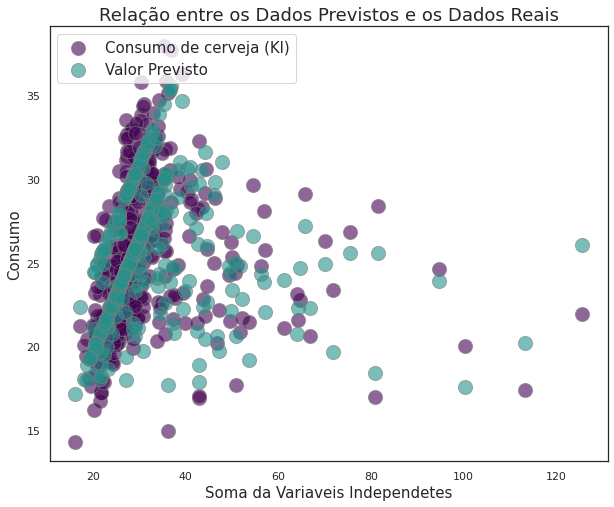

In [24]:
colors=['#440154', '#23918B']
labels=[variavel_alvo, 'previsto']
sns.set_style("white")
plt.figure(figsize=(10,8))

for i, label in enumerate(labels):
    y = resultado_previsto[label]
    # como havia mais de um atributo, usamos a soma do msm para gerar um score de comparação na plotagem do grafico
    x = resultado_previsto[variaveis_modelo].sum(axis=1)
    titleLabel  = ('Valor Previsto' if label == 'previsto' else label)
    plt.scatter(x, y, s=200, c=colors[i], linewidth=1, alpha=.6, edgecolors='grey', label=titleLabel )

plt.legend(loc='upper left', fontsize=15)
plt.title('Relação entre os Dados Previstos e os Dados Reais', fontsize=18)
plt.ylabel('Consumo', fontsize=15)
plt.xlabel('Soma da Variaveis Independetes', fontsize=15)
plt.show()

# Dataset para teste do modelo

Dataset obtido a partir de informações disponíveis no site https://pt.climate-data.org/

## Carregamento do dataset

In [25]:
# Criando dataframe
df_dados_climaticos = pd.read_excel('https://github.com/Andrewsas/trabalho-fundamentos-cid/blob/master/data/dados%20climaticos.xlsx?raw=true')

#rename column
df_dados_climaticos = df_dados_climaticos.rename(columns={ \
                                                      "Temperatura Media ( C )": "Temperatura Media (C)", \
                                                      "Temperatura Maxima ( C )": "Temperatura Maxima (C)", \
                                                      "Temperatura Minima ( C )": "Temperatura Minima (C)", \
                                                      })

df_dados_climaticos

,Data,Temperatura Media (C),Temperatura Maxima (C),Temperatura Minima (C),Precipitacao (mm),Cidade
0,1. Junho,26,29,24,7.8,Manaus
1,2. Junho,26,29,24,8.6,Manaus
2,3. Junho,26,29,24,7.9,Manaus
3,4. Junho,26,29,24,7.3,Manaus
4,5. Junho,26,29,24,6.9,Manaus
...,...,...,...,...,...,...
805,26. Junho,26,32,21,0.0,Palmas
806,27. Junho,27,32,21,0.0,Palmas
807,28. Junho,27,32,21,0.0,Palmas
808,29. Junho,27,32,21,0.0,Palmas


In [26]:
df_dados_climaticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data                    810 non-null    object 
 1   Temperatura Media (C)   810 non-null    int64  
 2   Temperatura Maxima (C)  810 non-null    int64  
 3   Temperatura Minima (C)  810 non-null    int64  
 4   Precipitacao (mm)       810 non-null    float64
 5   Cidade                  810 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 38.1+ KB


## Informação de Final de Semana

In [27]:
# print(df_dados_climaticos['Data'].str.startswith('5', na=False))
df_dados_climaticos['Final de Semana'] = np.where( \
                                                  df_dados_climaticos['Data'].str.startswith('5.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('6.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('12.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('13.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('19.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('20.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('26.', na=False) |
                                                  df_dados_climaticos['Data'].str.startswith('27.', na=False), \
                                                  1, 0)
print(df_dados_climaticos)

          Data  Temperatura Media (C)  ...  Cidade  Final de Semana
0     1. Junho                     26  ...  Manaus                0
1     2. Junho                     26  ...  Manaus                0
2     3. Junho                     26  ...  Manaus                0
3     4. Junho                     26  ...  Manaus                0
4     5. Junho                     26  ...  Manaus                1
..         ...                    ...  ...     ...              ...
805  26. Junho                     26  ...  Palmas                1
806  27. Junho                     27  ...  Palmas                1
807  28. Junho                     27  ...  Palmas                0
808  29. Junho                     27  ...  Palmas                0
809  30. Junho                     27  ...  Palmas                0

[810 rows x 7 columns]


##Testando modelo criado


In [28]:
previsto_teste = modelo_OLS.predict(sm.add_constant(df_dados_climaticos[variaveis_modelo]))
resultado_previsto_teste = df_dados_climaticos
resultado_previsto_teste['previsto'] = previsto_teste.round(2)
resultado_previsto_teste.index = range(resultado_previsto_teste.shape[0])
resultado_previsto_teste[variaveis_modelo + ['previsto'] + ['Cidade']]

,Temperatura Maxima (C),Precipitacao (mm),Final de Semana,previsto,Cidade
0,29,7.8,0,25.37,Manaus
1,29,8.6,0,25.33,Manaus
2,29,7.9,0,25.37,Manaus
3,29,7.3,0,25.40,Manaus
4,29,6.9,1,30.61,Manaus
...,...,...,...,...,...
805,32,0.0,1,33.01,Palmas
806,32,0.0,1,33.01,Palmas
807,32,0.0,0,27.83,Palmas
808,32,0.0,0,27.83,Palmas


##Explorando modelo de teste

In [33]:
df_consumo_por_cidade = resultado_previsto_teste.groupby(['Cidade']).agg({'previsto': np.sum, 'Temperatura Maxima (C)': np.mean}).sort_index().reset_index()
#organizando as colunas
df_consumo_por_cidade.columns = ['Cidade', 'Consumo Previsto (KL)', 'Média Temperatura Máx.']

df_consumo_por_cidade = df_consumo_por_cidade.round(2) 

df_consumo_por_cidade = df_consumo_por_cidade.sort_values(by='Consumo Previsto (KL)', ascending=False)
df_consumo_por_cidade

,Cidade,Consumo Previsto (KL),Média Temperatura Máx.
26,Teresina,887.12,32.60
18,Palmas,876.14,32.00
6,Cuiaba,839.41,30.20
19,Porto Velho,828.72,29.77
21,Rio Branco,816.06,29.10
10,Fortaleza,809.41,28.90
16,Maranhao,806.61,29.00
15,Manaus,804.44,29.00
13,Macapa,799.01,28.77
11,Goiania,783.06,27.37


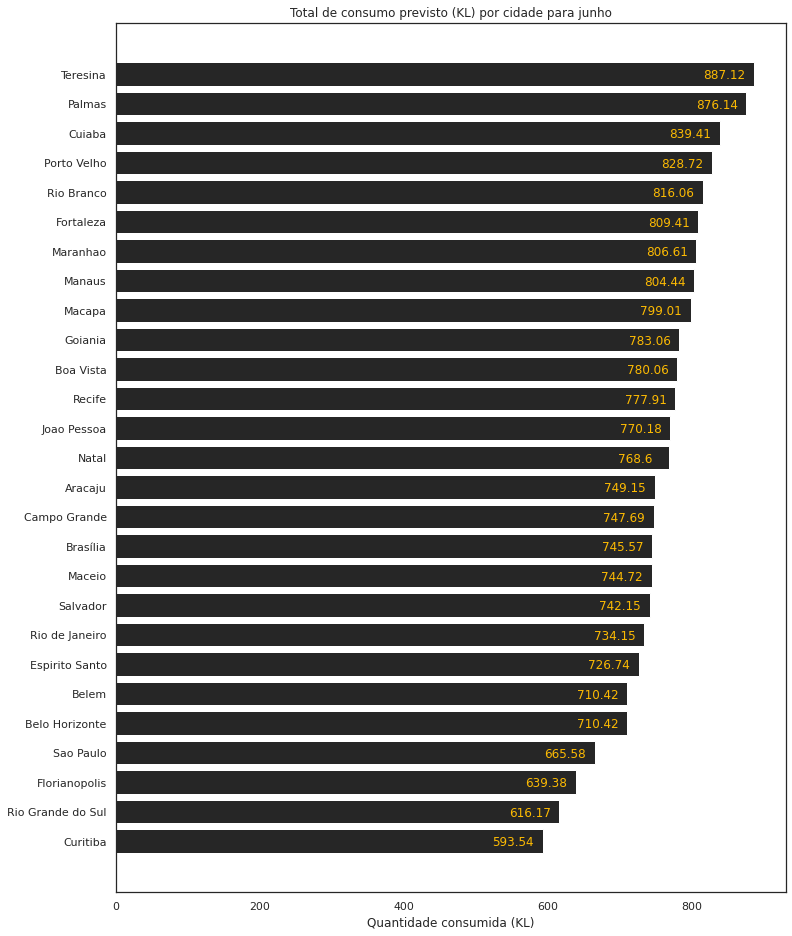

In [60]:
black = '#262626'
yellow = '#fcba03'

fig, ax = plt.subplots(figsize=(12,16))
plt.title( 'Total de consumo previsto (KL) por cidade para junho' )
plt.xlabel( 'Quantidade consumida (KL)' )

df_aux = df_consumo_por_cidade.sort_values('Consumo Previsto (KL)')
#Gráfico de barras
plt.barh( df_aux['Cidade'], df_aux['Consumo Previsto (KL)'], color=black )
for i, y in enumerate(df_aux['Consumo Previsto (KL)']):
    ax.text(y-70, i-.16, str(y), color=yellow)
plt.show()

In [31]:
df_consumo_max_por_cidade_dia = resultado_previsto_teste.groupby(['Cidade']).agg({'previsto': 'max', 'Temperatura Maxima (C)': 'max'}).sort_index().reset_index()
#organizando as colunas
df_consumo_max_por_cidade_dia.columns = ['Cidade', 'Consumo Previsto (KL)', 'Temperatura Máx.']

df_consumo_max_por_cidade_dia = df_consumo_max_por_cidade_dia.round(2) 

df_consumo_max_por_cidade_dia.sort_values(by='Consumo Previsto (KL)', ascending=False)

,Cidade,Consumo Previsto (KL),Temperatura Máx.
26,Teresina,33.67,33
18,Palmas,33.01,32
6,Cuiaba,32.34,31
21,Rio Branco,31.64,30
19,Porto Velho,31.63,31
10,Fortaleza,30.88,29
16,Maranhao,30.75,29
15,Manaus,30.72,29
13,Macapa,30.71,29
11,Goiania,30.34,28


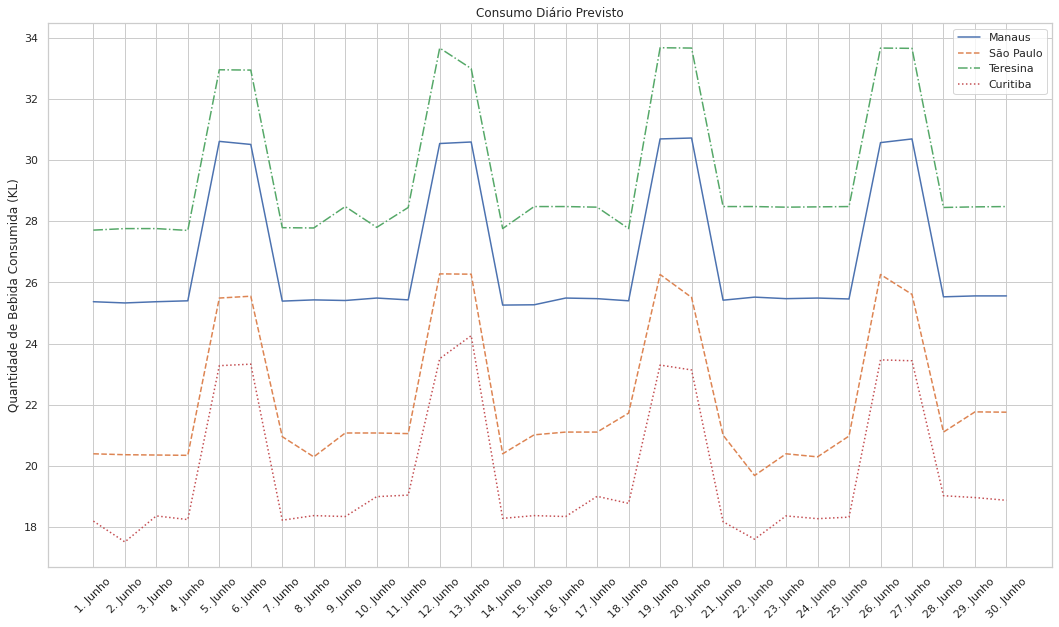

In [79]:
sns.set_style('whitegrid') # darkgrid, whitegrid, dark, white, ticks
plt.figure( figsize=(18,10) )
plt.title('Consumo Diário Previsto')
plt.ylabel('Quantidade de Bebida Consumida (KL)')

df_manaus = resultado_previsto_teste[resultado_previsto_teste['Cidade'] == 'Manaus']
df_sp = resultado_previsto_teste[resultado_previsto_teste['Cidade'] == 'Sao Paulo']
df_teresina = resultado_previsto_teste[resultado_previsto_teste['Cidade'] == 'Teresina']
df_curitiba = resultado_previsto_teste[resultado_previsto_teste['Cidade'] == 'Curitiba']

plt.plot( df_manaus['Data'], df_manaus['previsto'], label='Manaus', ls='-' )
plt.plot( df_manaus['Data'], df_sp['previsto'], label='São Paulo', ls='--' )
plt.plot( df_manaus['Data'], df_teresina['previsto'], label='Teresina', ls='-.' )
plt.plot( df_manaus['Data'], df_curitiba['previsto'], label='Curitiba', ls=':' )
plt.xticks( rotation=45 )
plt.legend()
plt.show()